In [9]:
import numpy as np
from datetime import datetime

# 日期转换函数
def dmy2ymd(dmy):
    # 将日-月-年 转为 年-月-日
	dmy = str(dmy, encoding='utf-8')
	time = datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates, opening_prices,highest_prices, \
	lowest_prices, closing_prices  = np.loadtxt('./data/aapl.csv',  # 读取文件
                  delimiter=',',  # 分隔符
                  usecols=(1, 3, 4, 5, 6),  # 要读取的列
                  dtype='M8[D], f8, f8, f8, f8',  # 每个维度的数据类型
                  unpack=True,  # 拆包
                  converters={1: dmy2ymd}  # 自定第几列使用的转换函数
                  )

N = 5
pred_prices = np.zeros(closing_prices.size - 2 * N + 1)
for i in range(pred_prices.size):
    a = np.zeros((N, N))
    for j in range(N):
        a[j, ] = closing_prices[i + j:i + j + N]
    b = closing_prices[i + N:i + N * 2]
    x = np.linalg.lstsq(a, b)[0]
    pred_prices[i] = b.dot(x)

print(pred_prices)

[375.39598946 176.10443179 362.12916588 374.87318038 362.43828678
 368.55793642 360.7734284  328.42048047 383.93813067 332.76173645
 323.71682553 246.92921269 352.22774697 347.78369406 357.31533985
 358.45152278 364.18764602 319.74039615 328.69669323 324.79198422
 352.51614809]


c:\programdata\anaconda3\envs\3.6\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


c:\programdata\anaconda3\envs\3.6\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


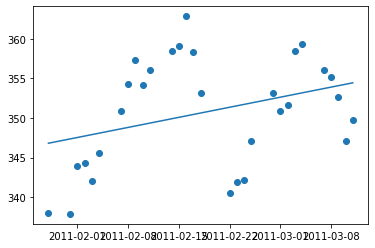

In [7]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
# 日期转换函数
def dmy2ymd(dmy):
    # 将日-月-年 转为 年-月-日
	dmy = str(dmy, encoding='utf-8')
	time = datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates, opening_prices,highest_prices, \
	lowest_prices, closing_prices  = np.loadtxt('./data/aapl.csv',  # 读取文件
                  delimiter=',',  # 分隔符
                  usecols=(1, 3, 4, 5, 6),  # 要读取的列
                  dtype='M8[D], f8, f8, f8, f8',  # 每个维度的数据类型
                  unpack=True,  # 拆包
                  converters={1: dmy2ymd}  # 自定第几列使用的转换函数
                  )
# 计算趋势价格，最高 最低 收盘 的平均值
trend_points = (highest_prices + lowest_prices + closing_prices) / 3

plt.scatter(dates, trend_points, marker='o')

# 绘制趋势线
days = dates.astype('int32')
A = np.ones((30, 2))
A[:,0] = dates
B = trend_points

k, b = np.linalg.lstsq(A, B)[0]

trend_line = k * days + b
plt.plot(days, trend_line)

plt.show()

a与b数组： [12 11  4  2  1  2 28  1  9 11] [ 7 22  7  3 23 28  3 21 16 25]
a与b样本方差： 68.98888888888888 92.5
a与b协方差： -29.25 -29.25


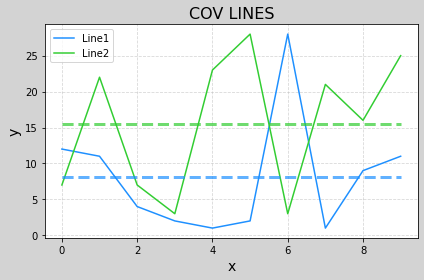

In [8]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.randint(1, 30, 10)
b = np.random.randint(1, 30, 10)
#平均值
ave_a = np.mean(a)
ave_b = np.mean(b)
#离差
dev_a = a - ave_a
dev_b = b - ave_b
#协方差
cov_ab = np.mean(dev_a*dev_b)
cov_ba = np.mean(dev_b*dev_a)

print('a与b数组：', a, b)
print('a与b样本方差：', np.sum(dev_a**2)/(len(dev_a)-1), np.sum(dev_b**2)/(len(dev_b)-1))
print('a与b协方差：',cov_ab, cov_ba)
#绘图，查看两条图线的相关性
plt.figure('COV LINES', facecolor='lightgray')
plt.title('COV LINES', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
x = np.arange(0, 10)
#a,b两条线
plt.plot(x, a, color='dodgerblue', label='Line1')
plt.plot(x, b, color='limegreen', label='Line2')
#a,b两条线的平均线
plt.plot([0, 9], [ave_a, ave_a], color='dodgerblue', linestyle='--', alpha=0.7, linewidth=3)
plt.plot([0, 9], [ave_b, ave_b], color='limegreen', linestyle='--', alpha=0.7, linewidth=3)

plt.grid(linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()